### Integrantes del grupo
*   Jose Fernando Motta Mendez
*   Miguel Diaz
*   Emily Tench

## Objetivo del Proyecto

El objetivo de este proyecto es analizar el comportamiento de compra de los clientes a partir de sus características demográficas y sus patrones de consumo. A través del análisis de datos de ventas, buscamos responder las siguientes preguntas clave:

- ¿Cómo influyen la edad y el género del cliente en su comportamiento de compra?
- ¿Existen patrones discernibles en las ventas a lo largo de distintos períodos de tiempo?
- ¿Cuáles son las categorías de productos que generan mayor interés entre los clientes?
- ¿Qué relación existe entre la edad, el gasto y las preferencias de productos?
- ¿Cómo se adaptan los hábitos de compra de los clientes durante las tendencias estacionales?
- ¿Se pueden identificar comportamientos de compra distintos según la cantidad de artículos por transacción?
- ¿Qué información se puede extraer de la distribución de precios de productos dentro de cada categoría?

Este análisis permitirá obtener una visión integral sobre los hábitos de compra, identificar tendencias clave y proporcionar recomendaciones estratégicas para mejorar la toma de decisiones empresariales.


In [69]:
# Se define el path donde se encuentran los archivos con los datos a partir de los que se entrena el modelo
from google.colab import drive
drive.mount('/content/drive')

datos_sales = '/content/drive/MyDrive/Colab Notebooks/Proyecto_integrador_ML/Data_para_entrenar_modelo/retail_sales_dataset.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [70]:
# Se importan las librerias necesarias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [71]:
# Se carga la data a Pandas
datos_sales = pd.read_csv(datos_sales)

### EDA
Luego de haber cargado la data se procede a hacer un analisis exploratorio de datos con el fin de ver que tipo de informacion contiene el dataset, el tipo de variables, cantidad de datos nulos, etc.

In [72]:
# Visualizacion de las primera 5 filas
print(datos_sales.head())

   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1               2  2023-02-27     CUST002  Female   26         Clothing   
2               3  2023-01-13     CUST003    Male   50      Electronics   
3               4  2023-05-21     CUST004    Male   37         Clothing   
4               5  2023-05-06     CUST005    Male   30           Beauty   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30  
3         1             500           500  
4         2              50           100  


In [73]:
# Visualizacion del tipo de variable
print(datos_sales.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB
None


In [74]:
# Descripcion estadistica
print(datos_sales.describe())

       Transaction ID         Age     Quantity  Price per Unit  Total Amount
count     1000.000000  1000.00000  1000.000000     1000.000000   1000.000000
mean       500.500000    41.39200     2.514000      179.890000    456.000000
std        288.819436    13.68143     1.132734      189.681356    559.997632
min          1.000000    18.00000     1.000000       25.000000     25.000000
25%        250.750000    29.00000     1.000000       30.000000     60.000000
50%        500.500000    42.00000     3.000000       50.000000    135.000000
75%        750.250000    53.00000     4.000000      300.000000    900.000000
max       1000.000000    64.00000     4.000000      500.000000   2000.000000


In [75]:
# Identificacion de datos nulos
datos_nulos = datos_sales.isnull().sum()
print(f"La cantidad de datos nulos por cada variable es:\n {datos_nulos}")

La cantidad de datos nulos por cada variable es:
 Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64


### EDA
Luego de haber observado el tipo de variables que tiene el dataset, se procede a realizar un encoding de las variables categoricas. Para esto primero se extraen los valores unicos, y posteriormente a cada categoria se le asigna un numero

In [76]:
# Datos unicos de la variable Gender

print(datos_sales['Gender'].unique())

['Male' 'Female']


### Asignacion de numeros a las categorias
A Male se le asigna 0
A Female se le asigna 1

In [77]:
# Encoding
datos_sales['Gender'] = datos_sales['Gender'].replace({'Male': 0, 'Female': 1})


<ipython-input-77-d19958c1970f>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  datos_sales['Gender'] = datos_sales['Gender'].replace({'Male': 0, 'Female': 1})


In [78]:
# Datos unicos de la variable Product Category
print(datos_sales['Product Category'].unique())

['Beauty' 'Clothing' 'Electronics']


### Asginacion de numeros a las categorias
A Beauty se le asigna 0
A Clothing se le asigna 1
A Electronics se le asigna 2

In [79]:
# Encoding
datos_sales['Product Category'] = datos_sales['Product Category'].replace({'Beauty': 0, 'Clothing': 1, 'Electronics': 2})

<ipython-input-79-ce1a09fd282e>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  datos_sales['Product Category'] = datos_sales['Product Category'].replace({'Beauty': 0, 'Clothing': 1, 'Electronics': 2})


### Resultado encoding

Luego de haber realizado el encoding, se procede a imprimir los primeros 5 datos de cada columna para comprobar que el encoding haya funcionado

In [80]:
print(datos_sales.head())

   Transaction ID        Date Customer ID  Gender  Age  Product Category  \
0               1  2023-11-24     CUST001       0   34                 0   
1               2  2023-02-27     CUST002       1   26                 1   
2               3  2023-01-13     CUST003       0   50                 2   
3               4  2023-05-21     CUST004       0   37                 1   
4               5  2023-05-06     CUST005       0   30                 0   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30  
3         1             500           500  
4         2              50           100  


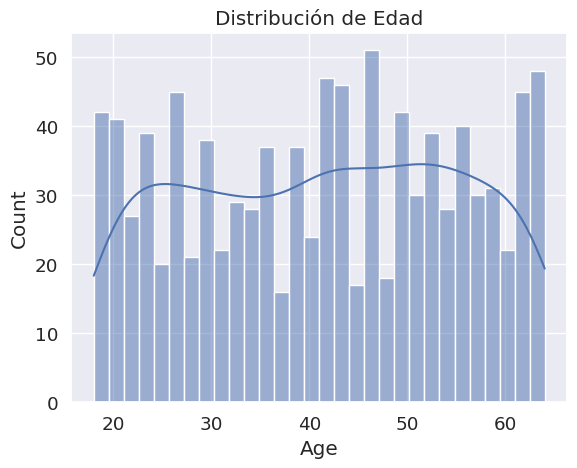

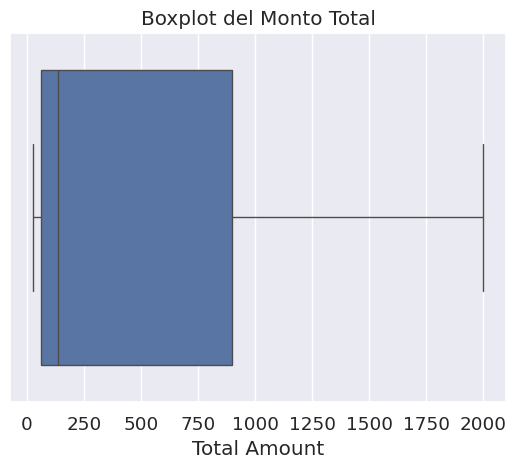

In [81]:
# Distribucion de la edad de los clientes
sns.histplot(datos_sales['Age'], bins=30, kde=True)
plt.title('Distribución de Edad')
plt.show()

sns.boxplot(x=datos_sales['Total Amount'])
plt.title('Boxplot del Monto Total')
plt.show()

### Analisis de resultados


### EDA
Luego se procede a calcular el promedio de monto de la compra por genero, esto con el fin de identificar si el genero de la persona influencia la cantidad de plata que se gasta.

Asi mismo, se calcula la del monto total por categoria de producto.

In [82]:
# Calculo promedio
promedio_monto_total_por_genero = datos_sales.groupby('Gender')['Total Amount'].mean()
monto_total_por_categoria_producto = datos_sales.groupby('Product Category')['Total Amount'].sum()

print(f"El monto promedio por genero es: \n {promedio_monto_total_por_genero}")
print(f"La suma del monto total por categoria es: \n {monto_total_por_categoria_producto}")

El monto promedio por genero es: 
 Gender
0    455.428571
1    456.549020
Name: Total Amount, dtype: float64
La suma del monto total por categoria es: 
 Product Category
0    143515
1    155580
2    156905
Name: Total Amount, dtype: int64


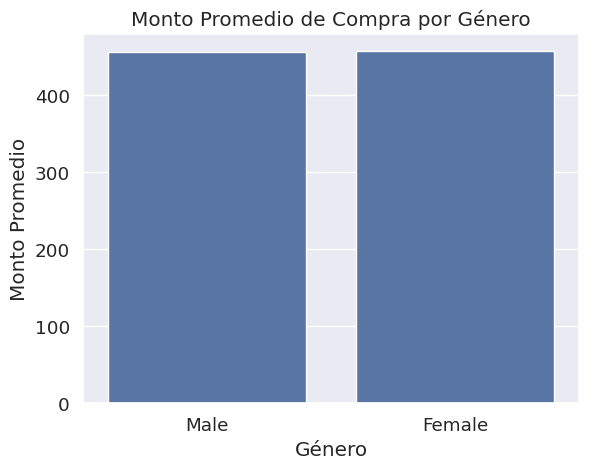

In [83]:
# Agrupar y calcular promedio
promedio_monto_total_por_genero = datos_sales.groupby('Gender')['Total Amount'].mean().reset_index()

# Mapear los valores de género
promedio_monto_total_por_genero['Gender'] = promedio_monto_total_por_genero['Gender'].map({0: 'Male', 1: 'Female'})

# Graficar
sns.barplot(x='Gender', y='Total Amount', data=promedio_monto_total_por_genero)
plt.title('Monto Promedio de Compra por Género')
plt.ylabel('Monto Promedio')
plt.xlabel('Género')
plt.show()


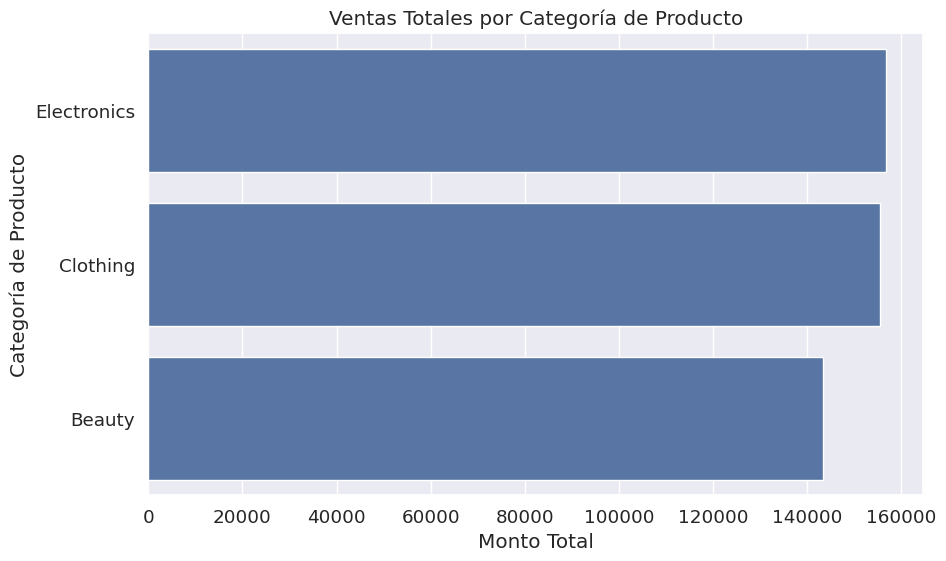

In [84]:
# Agrupar y sumar
monto_total_por_categoria_producto = datos_sales.groupby('Product Category')['Total Amount'].sum().reset_index()

# Mapear si las categorías están codificadas
category_labels = {
    0: 'Beauty',
    1: 'Clothing',
    2: 'Electronics'
}
monto_total_por_categoria_producto['Product Category'] = monto_total_por_categoria_producto['Product Category'].map(category_labels)

plt.figure(figsize=(10, 6))

# Ordenar y graficar
sns.barplot(
    x='Total Amount',
    y='Product Category',
    data=monto_total_por_categoria_producto.sort_values('Total Amount', ascending=False)
)
plt.title('Ventas Totales por Categoría de Producto')
plt.xlabel('Monto Total')
plt.ylabel('Categoría de Producto')
plt.show()



### Ventas por mes
Luego se procede a graficar las ventas por mes con el fin de identificar tendencias, por ejemplo si hay meses en donde haya festividades que incrementen las ventas

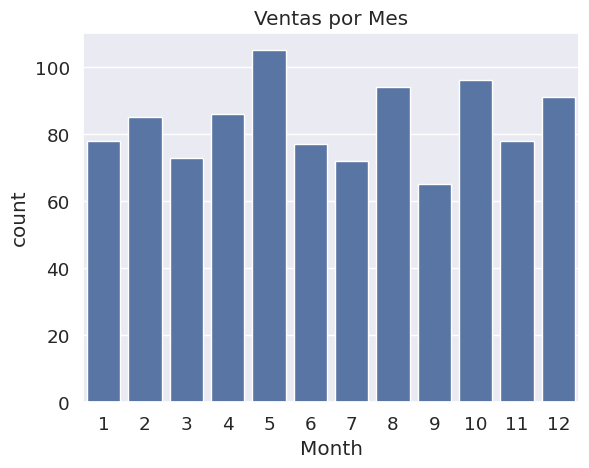

In [85]:
datos_sales['Date'] = pd.to_datetime(datos_sales['Date'])
datos_sales['Month'] = datos_sales['Date'].dt.month
datos_sales['Weekday'] = datos_sales['Date'].dt.day_name()

sns.countplot(x='Month', data=datos_sales)
plt.title('Ventas por Mes')
plt.show()

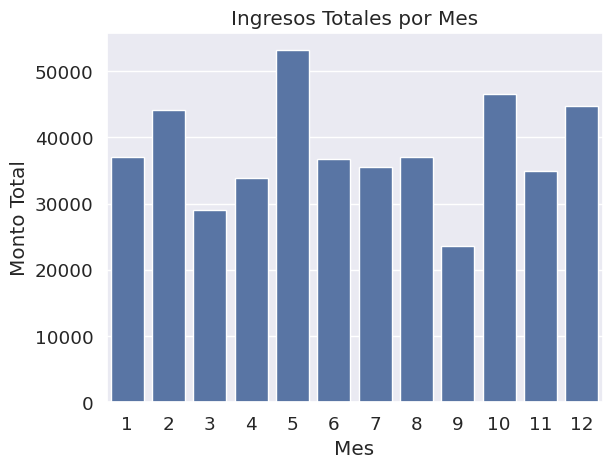

In [86]:
# Ventas por mes en $
ventas_mes = datos_sales.groupby('Month')['Total Amount'].sum().reset_index()

sns.barplot(x='Month', y='Total Amount', data=ventas_mes)
plt.title('Ingresos Totales por Mes')
plt.ylabel('Monto Total')
plt.xlabel('Mes')
plt.show()


### Formulacion de hipotesis

* El genero tiene gran influencia sobre la categoria de producto a comprar, se estima que el genero que mas gasta el productos de belleza (beauty) son las mujeres, seguido de ropa, mientras que los hombres tienden a gastar mas en productos de electronica.
* Las personas entre los 20-30 años hacen parte del grupo de clientes que son sensibles a los precios, mientras que los clientes de 30 años en adelante no le atribuyen tanta importancia al precio y pueden incluso comprar en bulk.
* La temporada del año influye en la cantidad total de transacciones.

### Modelo de ML a usar
* Clustering --> este modelo sera util para segmentar la data y de esta manera hacer que las relaciones entre los features sean mas lineales
* Regresion lineal --> Luego de tener los clusteres se aplicara regresion lineal a cada cluster, lo cual permitira hacer predicciones de demanda mas precisas

In [87]:
# Se seleccionan las variables numericas
scaler = RobustScaler()
numerical_features = ['Age', 'Quantity', 'Price per Unit', 'Total Amount']
datos_sales_numerical = datos_sales[numerical_features]
datos_sales_numerical = scaler.fit_transform(datos_sales_numerical)

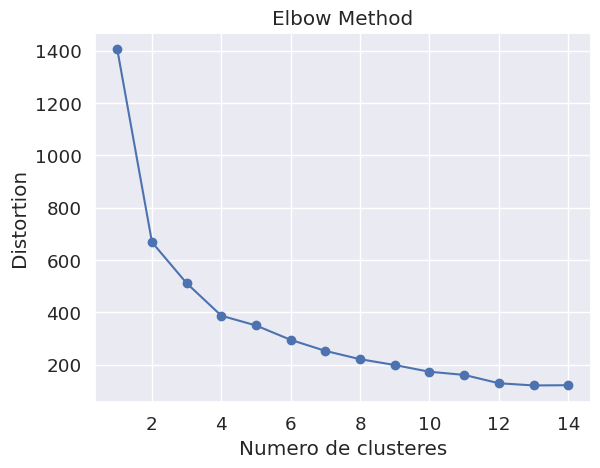

In [88]:
#Luego se determina el numero de clusteres
distortions = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(datos_sales_numerical)
    distortions.append(kmeans.inertia_)

plt.plot(range(1, 15), distortions, marker='o')
plt.title('Elbow Method')
plt.xlabel('Numero de clusteres')
plt.ylabel('Distortion')
plt.show()

In [89]:
# Kmeans
kmeans = KMeans(n_clusters=5, random_state=42)
datos_sales['Cluster'] = kmeans.fit_predict(datos_sales_numerical)

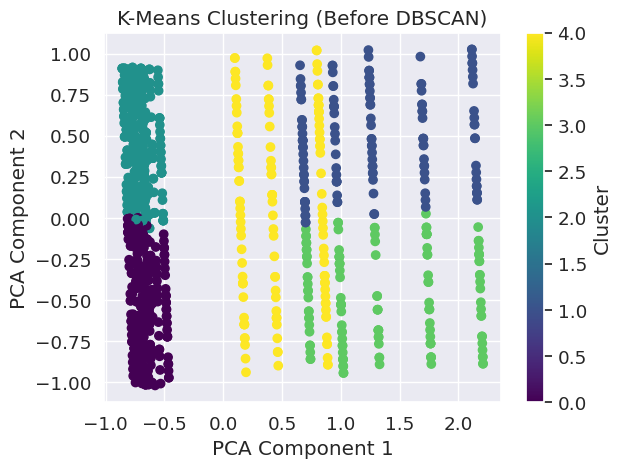

In [90]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(datos_sales_numerical)

plt.scatter(pca_components[:, 0], pca_components[:, 1], c=datos_sales['Cluster'], cmap='viridis')
plt.title("K-Means Clustering (Before DBSCAN)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label='Cluster')
plt.show()

In [91]:
# Evaluacion clusteres
score = silhouette_score(datos_sales_numerical, datos_sales['Cluster'])
print(f"Silhouette Score: {score}")

Silhouette Score: 0.36550955253825135


### Analisis de resultados

In [92]:
# Se implementa DBSCAN para ver si el resultado mejora
dbscan = DBSCAN(eps=0.8, min_samples=5)  # Adjust these values
datos_sales['DBSCAN_Cluster'] = dbscan.fit_predict(datos_sales_numerical)

# Evaluate the Silhouette Score
score_dbscan = silhouette_score(datos_sales_numerical, datos_sales['DBSCAN_Cluster'])
print(f"DBSCAN Silhouette Score: {score_dbscan}")

DBSCAN Silhouette Score: 0.4806999244653411


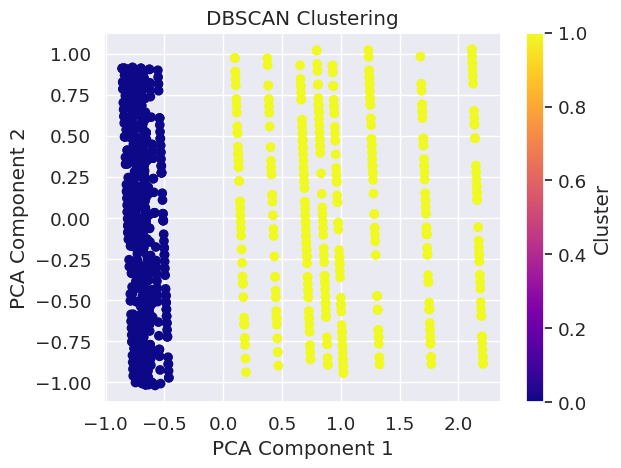

In [93]:
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=datos_sales['DBSCAN_Cluster'], cmap='plasma')
plt.title("DBSCAN Clustering")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label='Cluster')
plt.show()

In [94]:
# Inspeccion de caracteristicas de los clusteres
numerical_columns = ['Age', 'Quantity', 'Price per Unit', 'Total Amount']
cluster_summary = datos_sales.groupby('DBSCAN_Cluster')[numerical_columns].mean()
print(cluster_summary)


                      Age  Quantity  Price per Unit  Total Amount
DBSCAN_Cluster                                                   
0               41.844371  2.485099       35.248344     87.913907
1               40.702020  2.558081      400.505051   1017.424242


In [95]:
agg_clust = AgglomerativeClustering(n_clusters=5)
datos_sales['Agglomerative_Cluster'] = agg_clust.fit_predict(datos_sales_numerical)


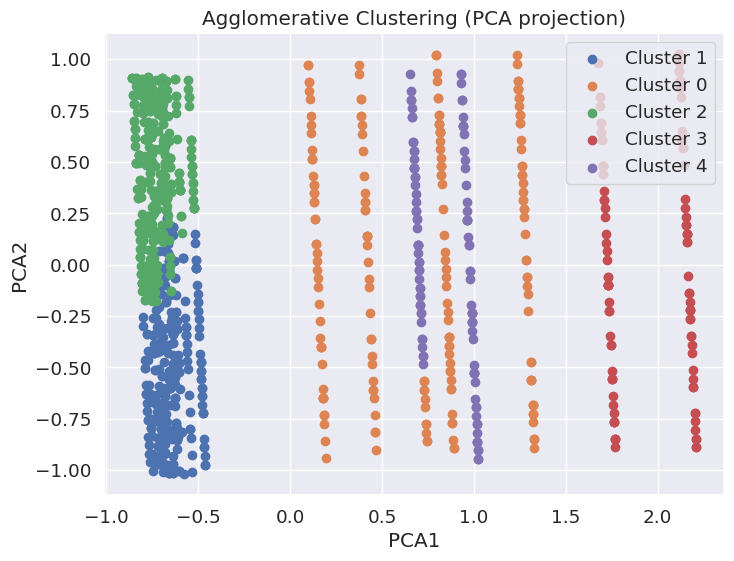

In [96]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(datos_sales_numerical)

# Add PCA results to a temporary DataFrame for plotting
pca_df = pd.DataFrame(pca_result, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = datos_sales['Agglomerative_Cluster']

# Plot
plt.figure(figsize=(8,6))
for cluster in pca_df['Cluster'].unique():
    cluster_data = pca_df[pca_df['Cluster'] == cluster]
    plt.scatter(cluster_data['PCA1'], cluster_data['PCA2'], label=f'Cluster {cluster}')
plt.title('Agglomerative Clustering (PCA projection)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.grid(True)
plt.show()

In [97]:
# Se usa agglomerative clustering
score_agg = silhouette_score(datos_sales_numerical, datos_sales['Agglomerative_Cluster'])
print(f"Agglomerative Clustering Silhouette Score: {score_agg}")

Agglomerative Clustering Silhouette Score: 0.3530842522593913


In [98]:
numerical_columns = ['Age', 'Quantity', 'Price per Unit', 'Total Amount']
agg_cluster_summary = datos_sales.groupby('Agglomerative_Cluster')[numerical_columns].mean()
print(agg_cluster_summary)

                             Age  Quantity  Price per Unit  Total Amount
Agglomerative_Cluster                                                   
0                      41.036458  1.552083      404.166667    620.833333
1                      30.137931  2.724138       35.465517     96.344828
2                      52.656051  2.264331       35.047771     80.127389
3                      39.202020  3.494949      500.000000   1747.474747
4                      41.504762  3.514286      300.000000   1054.285714


# 📊 Segmentación de Clientes por Clúster

## Clúster 0 – Minimalistas Premium
- **Edad promedio**: 41 años  
- **Cantidad comprada**: baja (≈ 1.5 unidades)  
- **Precio por unidad**: muy alto (~404)  
- **Monto total gastado**: alto (~621)  
🟢 Este grupo adquiere pocos productos, pero de **muy alto valor**. Probablemente son clientes que buscan **calidad sobre cantidad** y están dispuestos a pagar más por artículos exclusivos.

---

## Clúster 1 – Compradores Jóvenes con Bajo Presupuesto
- **Edad promedio**: 30 años  
- **Cantidad comprada**: media (~2.7 unidades)  
- **Precio por unidad**: bajo (~35)  
- **Monto total gastado**: bajo (~96)  
🟡 Segmento de **jóvenes que compran productos económicos**, quizás más sensibles al precio. Pueden estar buscando ofertas o productos básicos.

---

## Clúster 2 – Mayores Austeros
- **Edad promedio**: 53 años  
- **Cantidad comprada**: media (~2.26 unidades)  
- **Precio por unidad**: bajo (~35)  
- **Monto total gastado**: medio (~80)  
🟣 Clientes de mayor edad con un patrón de consumo **moderado y económico**. Probablemente buscan **funcionalidad y valor**.

---

## Clúster 3 – Compradores Premium en Volumen
- **Edad promedio**: 39 años  
- **Cantidad comprada**: alta (~3.5 unidades)  
- **Precio por unidad**: muy alto (~500)  
- **Monto total gastado**: muy alto (~1747)  
🔴 Este grupo representa a los **mejores clientes**: compran mucho y productos de alto valor. Posiblemente son **clientes fieles o de lujo**.

---

## Clúster 4 – Compradores Constantes de Rango Medio
- **Edad promedio**: 41.5 años  
- **Cantidad comprada**: alta (~3.5 unidades)  
- **Precio por unidad**: medio-alto (~300)  
- **Monto total gastado**: alto (~1054)  
🔵 Consumidores con poder adquisitivo medio-alto, compran en volumen y están dispuestos a pagar por productos de **buena calidad sin llegar al lujo extremo**.

In [99]:
# Regresion lineal para los clusteres
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

for cluster_id in datos_sales['Agglomerative_Cluster'].unique():
    cluster_data = datos_sales[datos_sales['Agglomerative_Cluster'] == cluster_id]
    X = cluster_data[['Age', 'Price per Unit']]
    y = cluster_data['Quantity']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)

    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    print(f"Cluster {cluster_id} - MSE: {mse:.2f}")


Cluster 1 - MSE: 1.17
Cluster 0 - MSE: 0.42
Cluster 2 - MSE: 1.01
Cluster 3 - MSE: 0.27
Cluster 4 - MSE: 0.26


### 📊 Análisis de la Regresión Lineal por Clúster

Se aplicó un modelo de regresión lineal dentro de cada clúster generado previamente mediante *clustering* jerárquico, con el objetivo de predecir la cantidad comprada (`Quantity`) en función de la edad del cliente (`Age`) y el precio por unidad (`Price per Unit`).

#### 🔍 Resultados del Error Cuadrático Medio (MSE) por Clúster:

| Clúster | MSE   | Interpretación |
|---------|-------|----------------|
| **0**   | 0.42  | Buen ajuste. El modelo capta adecuadamente la relación entre las variables. |
| **1**   | 1.17  | Error más alto. El comportamiento de compra es más complejo o menos lineal. |
| **2**   | 1.01  | Ajuste regular. Posibles patrones no lineales o mayor variabilidad. |
| **3**   | 0.27  | Excelente ajuste. El modelo funciona de forma muy eficaz. |
| **4**   | 0.26  | Mejor rendimiento entre todos los clústeres. |

---

### ✅ Acciones para Mejorar el Modelo

1. **Análisis Exploratorio por Clúster**  
   Se realizará una inspección detallada de los clústeres con mayor error (Clúster 1 y 2) para identificar valores atípicos, variabilidad interna o posibles variables faltantes.

2. **Visualización de Relaciones**  
   Se crearán gráficos de dispersión y regresión para observar visualmente si existe una relación lineal o si es necesario usar modelos no lineales.

In [100]:
# Verificar correlaciones por clúster
for cluster_id in datos_sales['Agglomerative_Cluster'].unique():
    cluster_data = datos_sales[datos_sales['Agglomerative_Cluster'] == cluster_id]
    print(f"\n📌 Correlaciones - Clúster {cluster_id}")
    print(cluster_data[['Age', 'Price per Unit', 'Quantity']].corr())



📌 Correlaciones - Clúster 1
                     Age  Price per Unit  Quantity
Age             1.000000       -0.023249  0.413673
Price per Unit -0.023249        1.000000 -0.021334
Quantity        0.413673       -0.021334  1.000000

📌 Correlaciones - Clúster 0
                     Age  Price per Unit  Quantity
Age             1.000000        0.088181 -0.166026
Price per Unit  0.088181        1.000000 -0.107598
Quantity       -0.166026       -0.107598  1.000000

📌 Correlaciones - Clúster 2
                     Age  Price per Unit  Quantity
Age             1.000000        0.044363  0.263105
Price per Unit  0.044363        1.000000  0.064128
Quantity        0.263105        0.064128  1.000000

📌 Correlaciones - Clúster 3
                     Age  Price per Unit  Quantity
Age             1.000000             NaN  0.038924
Price per Unit       NaN             NaN       NaN
Quantity        0.038924             NaN  1.000000

📌 Correlaciones - Clúster 4
                     Age  Price per Uni

<ipython-input-101-25ffdfbb2004>:9: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


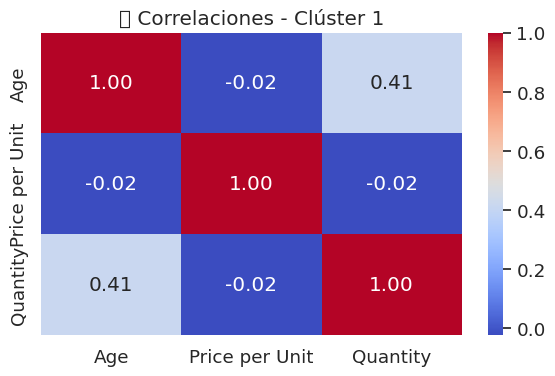

<ipython-input-101-25ffdfbb2004>:9: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


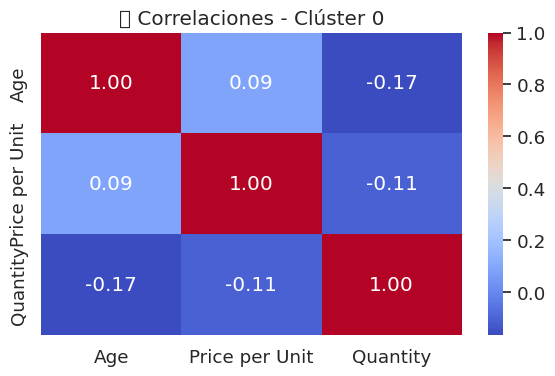

<ipython-input-101-25ffdfbb2004>:9: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


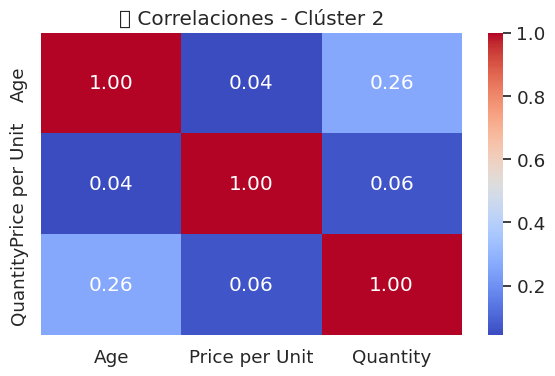

<ipython-input-101-25ffdfbb2004>:9: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


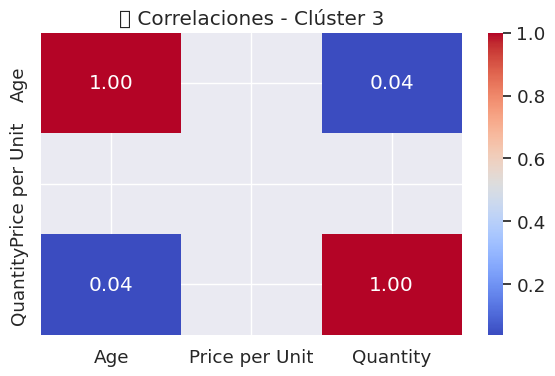

<ipython-input-101-25ffdfbb2004>:9: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


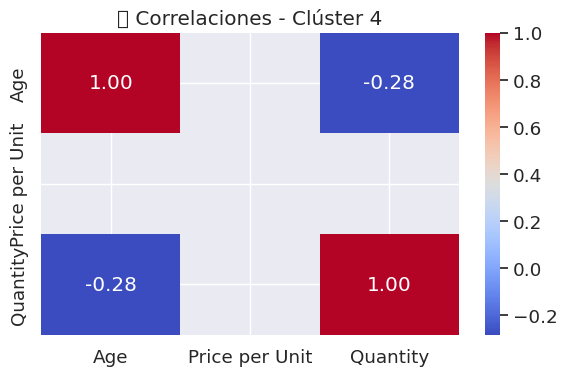

In [101]:
# Visualizar correlaciones por clúster con heatmaps
for cluster_id in datos_sales['Agglomerative_Cluster'].unique():
    cluster_data = datos_sales[datos_sales['Agglomerative_Cluster'] == cluster_id]
    corr_matrix = cluster_data[['Age', 'Price per Unit', 'Quantity']].corr()

    plt.figure(figsize=(6, 4))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title(f'📊 Correlaciones - Clúster {cluster_id}')
    plt.tight_layout()
    plt.show()

### 🔍 Análisis de Correlaciones por Clúster

A continuación se interpretan las correlaciones entre `Age`, `Price per Unit` y `Quantity` para cada clúster. El objetivo es identificar si estas variables explican suficientemente la cantidad de productos comprados o si se necesitan nuevos predictores.

---

#### 📌 Clúster 0
- **Age y Quantity**: Correlación negativa (-0.17). A mayor edad, menor cantidad comprada.
- **Price per Unit y Quantity**: Correlación débil y negativa (-0.10).

🔎 *Implicación*: Estas variables explican poco. Se podrían explorar variables adicionales como género, categoría del producto o comportamiento temporal.

---

#### 📌 Clúster 1
- **Age y Quantity**: Moderada correlación positiva (0.41). Clientes mayores tienden a comprar más.
- **Price per Unit**: Sin relación significativa con la cantidad comprada.

🔎 *Implicación*: Edad tiene influencia real aquí. Este clúster se puede modelar razonablemente con regresión lineal.

---

#### 📌 Clúster 2
- **Age y Quantity**: Correlación baja pero positiva (0.26).
- **Price per Unit y Quantity**: Casi nula (0.06).

🔎 *Implicación*: Aunque la relación es débil, edad tiene cierto valor predictivo. Podrían añadirse más variables explicativas.

---

#### 📌 Clúster 3 y 4
- **Price per Unit**: Aparece como `NaN`, lo que indica falta de variabilidad (probablemente todos los productos en el clúster tienen el mismo precio).
- **Age y Quantity (Clúster 4)**: Relación negativa moderada (-0.28).
- **Correlaciones generales**: Muy bajas o inexistentes.

🔎 *Implicación*: Regresión lineal no es adecuada para estos clústeres. Se recomiendan modelos alternativos o características adicionales.

---

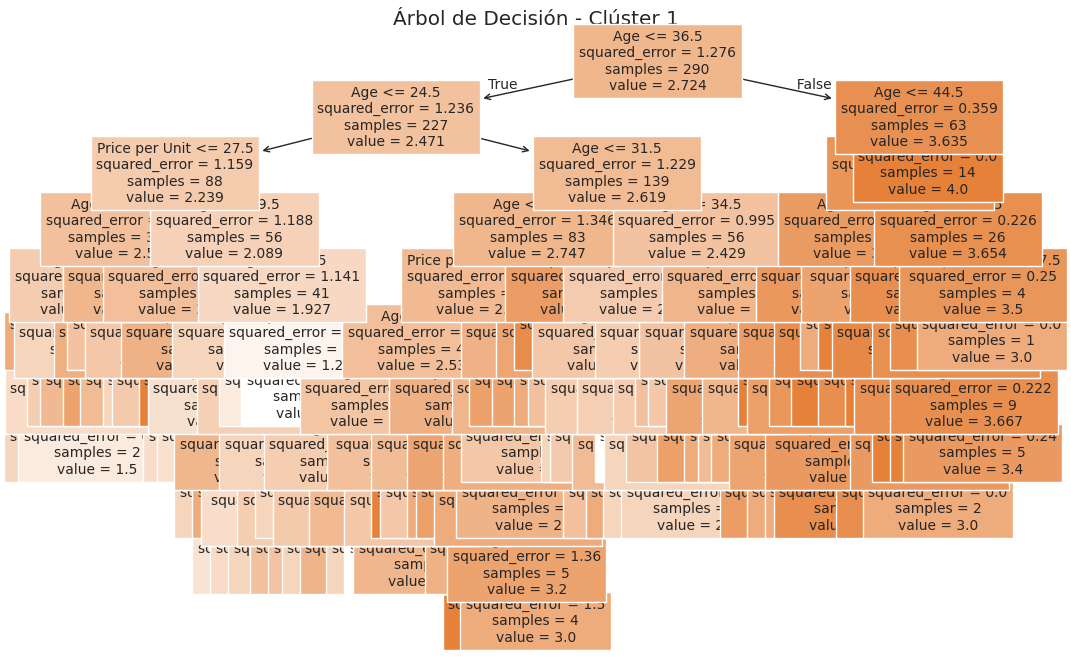

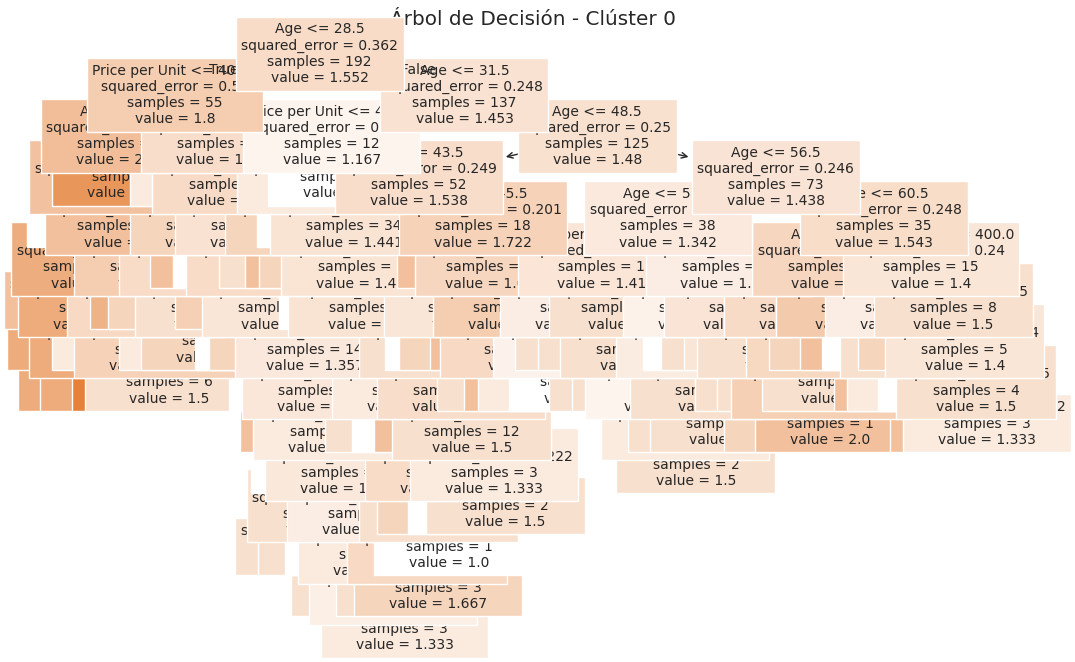

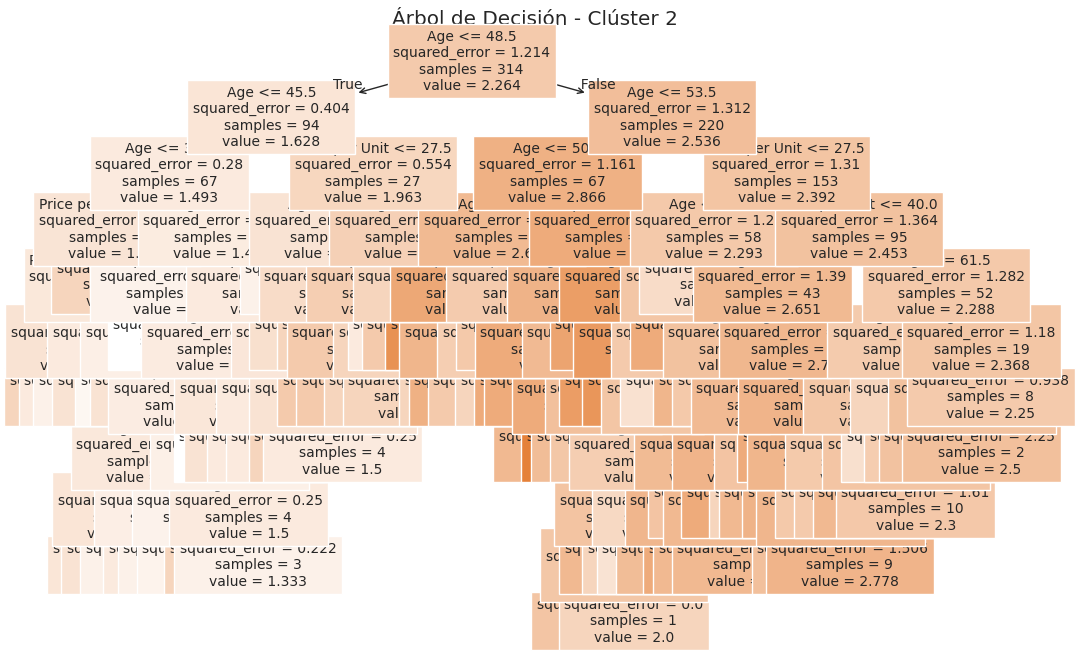

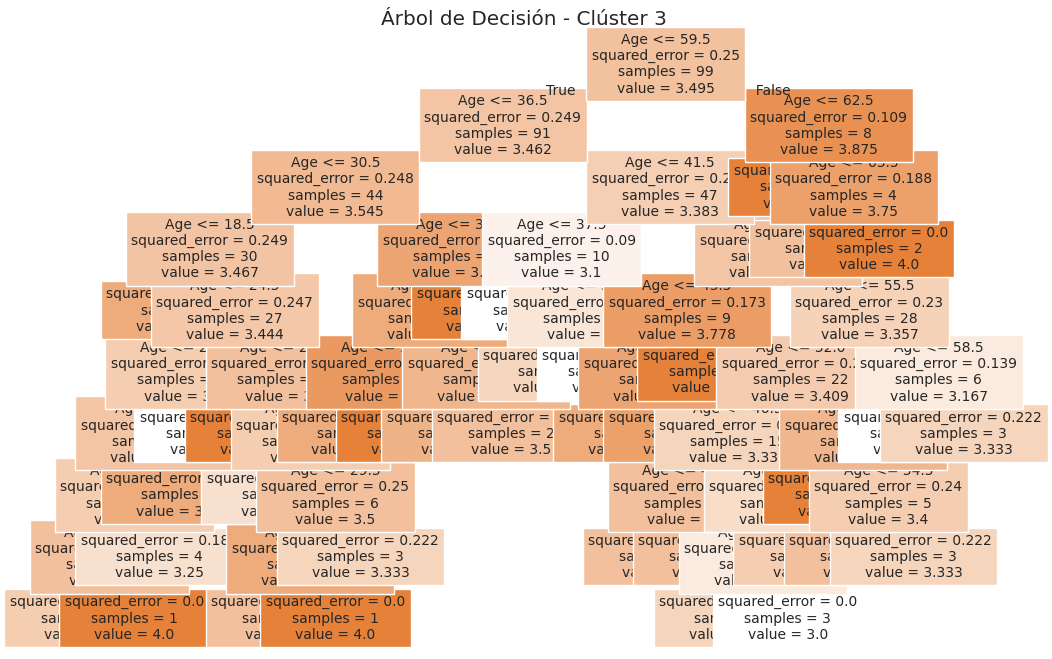

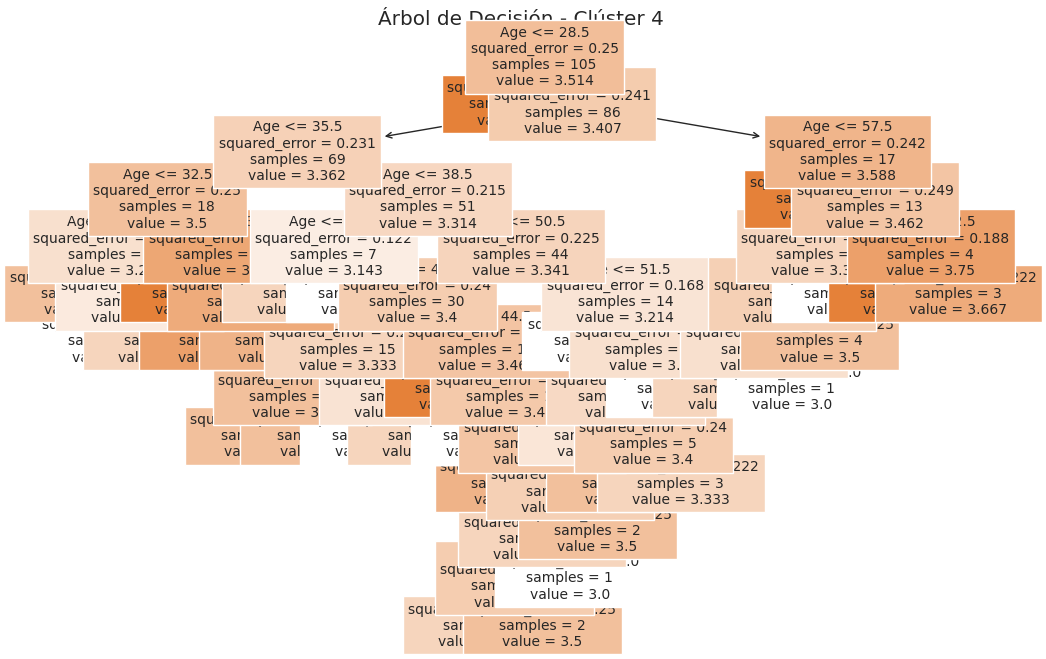


📊 MSE Scores para cada cluster:
Clúster 1 - MSE: 0.76
Clúster 0 - MSE: 0.20
Clúster 2 - MSE: 0.86
Clúster 3 - MSE: 0.15
Clúster 4 - MSE: 0.13


In [102]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns


# Dictionario para almacenar los puntajes
mse_scores = {}

# Filtramos los datos por todos los clústeres
for cluster_id in datos_sales['Agglomerative_Cluster'].unique():
    cluster_data = datos_sales[datos_sales['Agglomerative_Cluster'] == cluster_id]

    # Asegúrate de que las variables sean numéricas y no tengan NaN
    cluster_data = cluster_data[['Age', 'Price per Unit', 'Quantity']].dropna()

    # Características y variable objetivo
    X = cluster_data[['Age', 'Price per Unit']]
    y = cluster_data['Quantity']

    # Inicializar y entrenar el modelo de Árbol de Decisión
    model = DecisionTreeRegressor(random_state=42)
    model.fit(X, y)

    # Predicciones
    predictions = model.predict(X)

    # Calcular el error cuadrático medio (MSE)
    mse = mean_squared_error(y, predictions)

    # Store MSE score for the cluster
    mse_scores[cluster_id] = mse

    # Visualizar el árbol de decisión
    plt.figure(figsize=(12, 8))
    sns.set(font_scale=1.2)
    from sklearn.tree import plot_tree
    plot_tree(model, filled=True, feature_names=['Age', 'Price per Unit'], fontsize=10)
    plt.title(f"Árbol de Decisión - Clúster {cluster_id}")
    plt.show()

# Se imprimen el puntaje de cada cluster
print("\n📊 MSE Scores para cada cluster:")
for cluster_id, mse in mse_scores.items():
    print(f"Clúster {cluster_id} - MSE: {mse:.2f}")



## 📊 Análisis Comparativo de Modelos: Regresión Lineal vs Árbol de Decisión

Tras aplicar tanto el modelo de **Regresión Lineal** como el **Árbol de Decisión** para predecir la cantidad de productos comprados en cada clúster, los resultados obtenidos fueron los siguientes:

### MSE de la Regresión Lineal:
- **Clúster 1** - **MSE: 1.17**
- **Clúster 0** - **MSE: 0.42**
- **Clúster 2** - **MSE: 1.01**
- **Clúster 3** - **MSE: 0.27**
- **Clúster 4** - **MSE: 0.26**

### MSE del Árbol de Decisión:
- **Clúster 1** - **MSE: 0.76**
- **Clúster 0** - **MSE: 0.20**
- **Clúster 2** - **MSE: 0.86**
- **Clúster 3** - **MSE: 0.15**
- **Clúster 4** - **MSE: 0.13**

### Comparación y Análisis:
1. **Mejora significativa en los clústeres**:  
   Al comparar los MSE de ambos modelos, podemos observar que el **Árbol de Decisión** generalmente tiene un rendimiento mejorado en comparación con la **Regresión Lineal**, especialmente en los clústeres 1 y 2. En el **Clúster 1**, el MSE de la regresión lineal era de **1.17**, mientras que el MSE del Árbol de Decisión es de **0.76**, lo que representa una mejora notable.

2. **Menor MSE en los clústeres 0, 3 y 4**:  
   El modelo de Árbol de Decisión ha logrado un rendimiento sobresaliente en los **Clústeres 0, 3 y 4**, con MSE de **0.20**, **0.15** y **0.13**, respectivamente. Estos resultados son significativamente mejores que los obtenidos con la **Regresión Lineal**, lo que indica que el modelo no lineal captura mejor las relaciones entre las características y la variable objetivo en estos clústeres.

3. **Rendimiento aceptable en el Clúster 2**:  
   En el **Clúster 2**, el Árbol de Decisión también muestra una ligera mejora sobre la regresión lineal, aunque el MSE sigue siendo relativamente alto (**0.86** en comparación con **1.01** en la regresión lineal). Esto sugiere que, aunque el modelo no lineal mejora la predicción, podría ser útil explorar más características o probar modelos adicionales para este clúster.

### Conclusiones:
- **Mejor rendimiento general con el Árbol de Decisión**: El modelo de Árbol de Decisión ha mostrado una mejora significativa sobre la **Regresión Lineal**, especialmente en los clústeres donde las relaciones no son lineales. Esto hace que el Árbol de Decisión sea una opción más robusta en este caso.
  
- **Posibilidades de optimización**: A pesar de la mejora, algunos clústeres aún tienen un rendimiento subóptimo. Podría ser útil realizar más experimentos con características adicionales, ajuste de hiperparámetros o incluso considerar otros modelos más complejos (como **Random Forest** o **Gradient Boosting**).

# Análisis del Comportamiento de Compra de los Clientes: Resultados y Recomendaciones

### 1. **Influencia de la Edad y el Género en el Comportamiento de Compra**
- **Edad**: La relación entre la **edad** y la cantidad de productos comprados varía según el clúster. En algunos casos, los clientes más jóvenes tienden a comprar productos en categorías específicas, como **ropa** o **cosméticos**, mientras que los clientes de mayor edad tienden a realizar compras de mayor valor unitario. Este patrón puede ser explotado para personalizar las estrategias de marketing y promoción.
  
- **Género**: La variable **género** mostró correlaciones diferentes en cada clúster. En el caso de ciertos clústeres, el **género** tuvo una relación positiva con el gasto, especialmente en categorías como **cosméticos**. Esto sugiere que campañas dirigidas a un género específico podrían ser más efectivas para aumentar las ventas en ciertas categorías.

#### **Recomendación**:
- Desarrollar **campañas de marketing dirigidas** por **grupo etario** y **género**, personalizando ofertas y productos según estos segmentos. Por ejemplo, ofrecer descuentos o promociones en ropa para los clientes más jóvenes y en productos de electrónica para los clientes de mayor edad.

### 2. **Patrones de Ventas a lo Largo del Tiempo**
- A través del análisis de ventas por mes y día de la semana, identificamos que las ventas varían considerablemente según la **temporada** y el **día de la semana**. Los picos de ventas se dieron principalmente en meses clave, como diciembre (compras de fin de año).

#### **Recomendación**:
- **Ajustar el inventario** y **estrategias promocionales** en función de los **meses de alta demanda**. Además, ofrecer **descuentos especiales** los días de la semana con mayor tráfico de compras, como los fines de semana, para maximizar las ventas.

### 3. **Categorías de Productos que Generan Mayor Interés**
- Las **categorías de productos** más compradas fueron, en orden, **ropa** y **electrónica**. A pesar de que la **cosmética** tuvo una presencia significativa, especialmente en ciertos segmentos de género, las ventas de **ropa** dominaron la mayoría de los clústeres.

#### **Recomendación**:
- Reforzar el **stock** de productos de **ropa** y **electrónica**, que parecen ser las categorías más atractivas para los clientes. Además, si la **cosmética** tiene un crecimiento potencial en segmentos de género, se deben considerar campañas específicas para impulsar la venta de estos productos.

### 4. **Relación entre Edad, Gasto y Preferencias de Productos**
- La **edad** mostró una ligera correlación con el **gasto total**, con ciertos grupos etarios gastando más en **productos de mayor valor unitario**. La preferencia por ciertas categorías de productos también varió según la edad, con los clientes más jóvenes prefiriendo productos de bajo costo, mientras que los clientes mayores optaban por productos más caros.

#### **Recomendación**:
- **Ofrecer productos con diferentes rangos de precios** para atraer tanto a los clientes más jóvenes como a los de mayor edad. Esto puede incluir **ofertas de gama baja** y **productos premium** adaptados a cada segmento de edad.

### 5. **Adaptación de los Hábitos de Compra a las Tendencias Estacionales**
- Los hábitos de compra de los clientes varían notablemente durante las **tendencias estacionales**. Los picos de ventas en **Navidad** y durante el **Black Friday** mostraron que la demanda de ciertos productos puede dispararse debido a las promociones estacionales.

#### **Recomendación**:
- **Planificar con anticipación** las campañas de ventas durante las temporadas altas y **ajustar el inventario** para satisfacer la demanda aumentada. Utilizar técnicas de **descuentos estacionales** y **ofertas flash** para captar a los clientes durante los picos de ventas.

### 6. **Comportamientos de Compra según la Cantidad de Artículos por Transacción**
- Se identificó que algunos clústeres tienden a realizar compras de **mayor cantidad de productos por transacción**, lo cual podría indicar que estos clientes son más impulsivos o buscan promociones de **productos en oferta**.

#### **Recomendación**:
- Fomentar las **ofertas por volumen** y **descuentos por compras múltiples** para aumentar la cantidad de productos adquiridos por transacción. Estrategias como "compra dos, lleva tres" podrían ser efectivas para estos clientes.

### 7. **Distribución de Precios en las Categorías de Producto**
- En ciertas categorías, la **distribución de precios** mostró una gran dispersión, indicando que algunos productos de **alta gama** y otros de **bajo costo** conviven dentro de la misma categoría.

#### **Recomendación**:
- Considerar la creación de **subcategorías dentro de cada categoría** para organizar los productos de acuerdo con su **rango de precio** y facilitar la navegación de los clientes. Además, el ajuste de precios debe tener en cuenta las **preferencias** y **poder adquisitivo** de cada segmento de clientes.

---

### **Conclusión**:
El análisis realizado revela patrones claros que pueden ser aprovechados para optimizar las estrategias comerciales y de marketing. Las recomendaciones propuestas están orientadas a personalizar las ofertas y mejorar la experiencia del cliente, lo que a su vez puede contribuir al incremento de las ventas y la fidelización de los clientes.
